<a href="https://colab.research.google.com/github/priyanshgupta1998/Machine_learning/blob/master/Quora_Scraping/Part2_Data_Analysis/Text_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

#Mount dataset from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data  = pd.read_csv('/content/drive/My Drive/Data_WhareHouse/Tokens.csv')

In [4]:
df = data.copy()
print(df.shape)
df.head()

(573, 1)


,Tokens
0,"['As', 'a', 'collector', 'and', 'lover', 'of',..."
1,"['Titan', 'Company', 'Limited', '(', 'earlier'..."
2,"['I', 'have', 'just', 'bought', 'a', 'Titan', ..."
3,"['Titan', 'watches', 'are', 'one', 'of', 'a', ..."
4,"['Over', 'the', 'period', 'of', 'time', 'titan..."


#Remove 25 Blank Rows

In [5]:
df = df[df['Tokens']!='[]']
print(df.shape)
df.head()

(545, 1)


,Tokens
0,"['As', 'a', 'collector', 'and', 'lover', 'of',..."
1,"['Titan', 'Company', 'Limited', '(', 'earlier'..."
2,"['I', 'have', 'just', 'bought', 'a', 'Titan', ..."
3,"['Titan', 'watches', 'are', 'one', 'of', 'a', ..."
4,"['Over', 'the', 'period', 'of', 'time', 'titan..."


In [6]:
print(list(df.index )[66:75])
index = []
for i in range(len(df)):
  index.append(i)
print(len(index))
df.index = index 
print(list(df.index )[66:75])

[66, 67, 68, 69, 70, 72, 73, 75, 76]
545
[66, 67, 68, 69, 70, 71, 72, 73, 74]


In [7]:
print(type(df['Tokens'][0]))

<class 'str'>


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english')) 

In [0]:
# import ast
# filtered_sentence = [] 
# good = []
# for i in range(0,200):
#   filtered_sentence = []
#   word_tokens = ast.literal_eval(df['Tokens'][i])
#   if(len(word_tokens)<5000):
#     for w in word_tokens:
#       w = w.lower()
#       if w not in stop_words:
#         filtered_sentence.append(w)
#   good.append(filtered_sentence)
# #   print(i, 'Number of Tokens initially : ' , len(df['Tokens'][i]) , ' , Number of tokens after removing stopwords : ' ,len(filtered_sentence))
# #   print(filtered_sentence)
# bakvas = pd.DataFrame()
# bakvas['Tokens_after_removing_Stopwords'] = good
# bakvas.to_csv('/content/drive/My Drive/Data_WhareHouse/good_0.csv')
# print(bakvas.shape)
# bakvas.head()

#Remove Stopwords and drop 14 rows which contain long answer , (due to less RAM)

In [0]:
import ast
filtered_sentence = [] 
good = []
c = 0
for i in range(len(df)):
  filtered_sentence = []
  if(len(df['Tokens'][i])<7000000):
    word_tokens = ast.literal_eval(df['Tokens'][i])
    if(len(word_tokens)<500000):
      c +=1
      for w in word_tokens:
        w = w.lower()
        if w not in stop_words:
          filtered_sentence.append(w)
      good.append(filtered_sentence)
#       print(c , '-->' , i, 'Number of Tokens initially : ' , len(word_tokens) , ' , Number of tokens after removing stopwords : ' ,len(filtered_sentence))

In [60]:
bakvas = good.copy()
len(bakvas)

531

In [61]:
print(len(bakvas))
for i in range(len(bakvas)):
  if(len(bakvas[i])==0):
    print(i ,bakvas[i] )

531
66 []
325 []
363 []


In [0]:
#Delete empty rows
del bakvas[66]
del bakvas[324]
del bakvas[361]

#Remove Punctuation

In [0]:
for i in range(len(bakvas)):
  bakvas[i] = [bakvas[i][j] for j in range(len(bakvas[i])) if(len(bakvas[i][j])>3)]

#Text Normalization

In [0]:
lucky = []
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
for i in range(len(bakvas)):
  lemma_word = []
  for w in bakvas[i]:
      #Go through all process of the dictionary
      word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")   #Search for Noun
      word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")   #Search for Verb
      word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))   #Search for Adjective
      lemma_word.append(word3)   # Finally append the lemma of the original word
  lucky.append(list(set(lemma_word)))

In [0]:
print(len(lucky))
print(lucky[0])
print(lucky[1])
print(lucky[2])
print(lucky[3])
print(lucky[4])

In [75]:
total = []
for i in lucky:
  total+=i
print(len(total))

20874


#Bag of Words

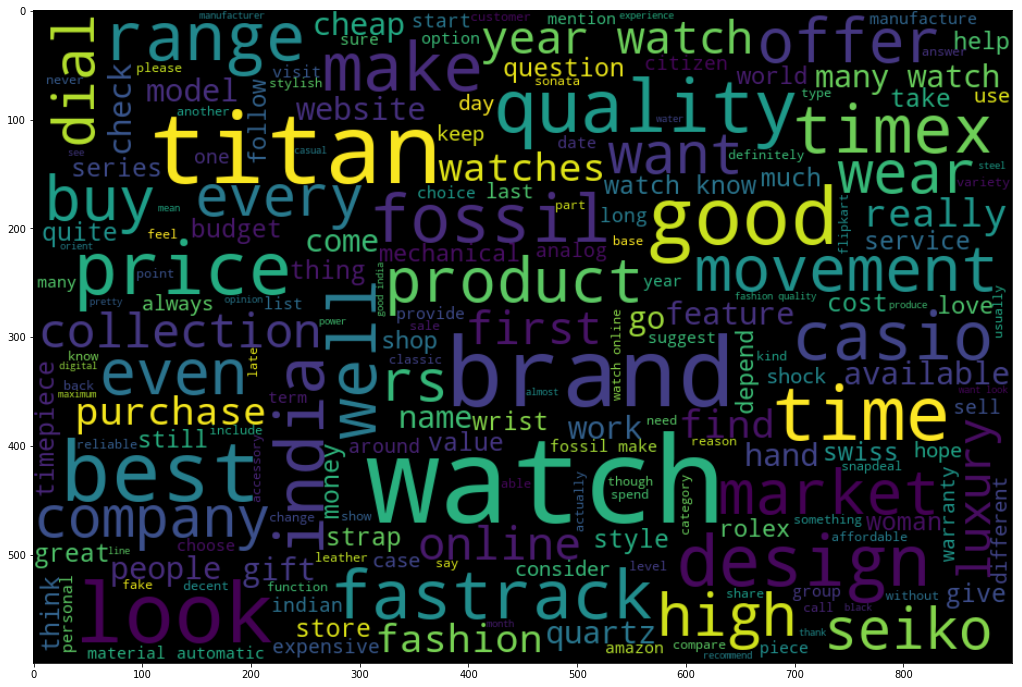

In [79]:
import matplotlib.pyplot as plt
all_words = ' '.join([tags for tags in total])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('on')
plt.show()

`From above Bag of words diagram we can easily understand that ppl are talking about fastrac , timex ,titan watches mostly .  and they are more focusing on price of the watch . So watch seaching is divided into 3 parts .`      

`1. DESIGN`  
`2.PRICE`          
`3. COMPANY( BRAND)`

#+++++++++++++++++++++++++++++++END++++++++++++++++++++++++
#//@Priyansh Gupta
pg170898@gmail.com